In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from documents.load_data import *
from Model.Shallow_CNN import *

In [2]:
train_loader, test_loader, val_loader, _ = loader()(subject = 1,
                                             batch_size= 30,
                                             num_validation =37)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [3]:
criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    

def test(test_loader=test_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = Variable(data), Variable(target).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [4]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))

    print('Test set result:')
    test(test_loader, mode = 'val')

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.386223
Train Epoch: 0 [150/199 (71%)]	Loss: 1.344679
train loss: 1.2475, Accuracy: 94/199 (47%)
validation loss: 1.2746, Accuracy: 18/38 (47%)

Train Epoch: 1 [0/199 (0%)]	Loss: 1.279430
Train Epoch: 1 [150/199 (71%)]	Loss: 1.316000
train loss: 1.1369, Accuracy: 95/199 (48%)
validation loss: 1.1840, Accuracy: 21/38 (55%)

Train Epoch: 2 [0/199 (0%)]	Loss: 1.113809
Train Epoch: 2 [150/199 (71%)]	Loss: 1.018075
train loss: 1.0523, Accuracy: 108/199 (54%)
validation loss: 1.1445, Accuracy: 22/38 (58%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.997332
Train Epoch: 3 [150/199 (71%)]	Loss: 0.956217
train loss: 0.9394, Accuracy: 126/199 (63%)
validation loss: 1.1784, Accuracy: 19/38 (50%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.856231
Train Epoch: 4 [150/199 (71%)]	Loss: 1.108

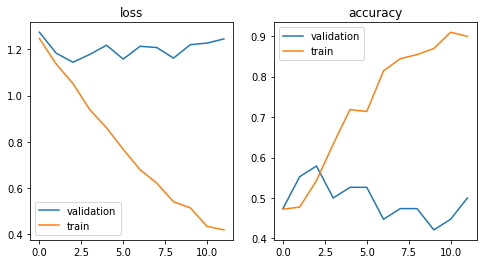

In [13]:
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 12)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.395062
Train Epoch: 0 [150/198 (71%)]	Loss: 1.387287
train loss: 1.2361, Accuracy: 103/198 (52%)
validation loss: 1.3263, Accuracy: 13/38 (34%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.233784
Train Epoch: 1 [150/198 (71%)]	Loss: 1.127103
train loss: 1.0623, Accuracy: 109/198 (55%)
validation loss: 1.2892, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.055546
Train Epoch: 2 [150/198 (71%)]	Loss: 1.039887
train loss: 0.9817, Accuracy: 117/198 (59%)
validation loss: 1.2900, Accuracy: 18/38 (47%)

Train Epoch: 3 [0/198 (0%)]	Loss: 1.088440
Train Epoch: 3 [150/198 (71%)]	Loss: 0.966136
train loss: 0.9108, Accuracy: 124/198 (63%)
validation loss: 1.2676, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.896591
Train Epoch: 4 [150/198 (71%)]	Loss: 0.7

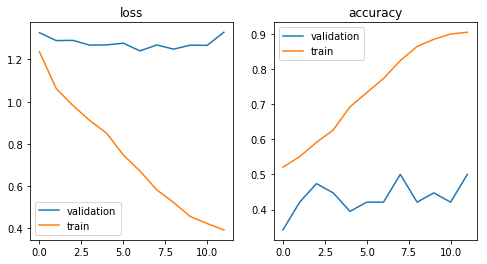

In [14]:
train_loader, test_loader, val_loader,_ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 12)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.380023
Train Epoch: 0 [150/198 (71%)]	Loss: 1.377437
train loss: 1.2783, Accuracy: 99/198 (50%)
validation loss: 1.3629, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.191557
Train Epoch: 1 [150/198 (71%)]	Loss: 1.202007
train loss: 1.1036, Accuracy: 117/198 (59%)
validation loss: 1.3472, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.088161
Train Epoch: 2 [150/198 (71%)]	Loss: 0.932216
train loss: 0.9519, Accuracy: 131/198 (66%)
validation loss: 1.2749, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.813831
Train Epoch: 3 [150/198 (71%)]	Loss: 0.941206
train loss: 0.8048, Accuracy: 147/198 (74%)
validation loss: 1.2240, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.857370
Train Epoch: 4 [150/198 (71%)]	Loss: 0.74

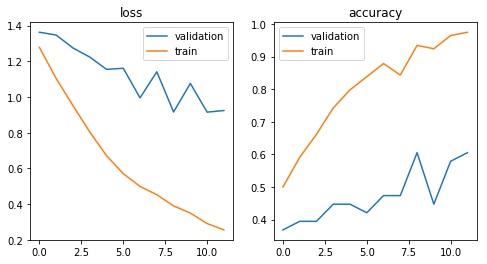

In [15]:
train_loader, test_loader, val_loader,_ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 12)

Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/196 (0%)]	Loss: 1.398124
Train Epoch: 0 [150/196 (71%)]	Loss: 1.398481
train loss: 1.2579, Accuracy: 95/196 (48%)
validation loss: 1.3611, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/196 (0%)]	Loss: 1.184756
Train Epoch: 1 [150/196 (71%)]	Loss: 1.162726
train loss: 1.1037, Accuracy: 106/196 (54%)
validation loss: 1.4024, Accuracy: 12/38 (32%)

Train Epoch: 2 [0/196 (0%)]	Loss: 1.067925
Train Epoch: 2 [150/196 (71%)]	Loss: 0.999242
train loss: 0.9994, Accuracy: 119/196 (61%)
validation loss: 1.3616, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/196 (0%)]	Loss: 1.127411
Train Epoch: 3 [150/196 (71%)]	Loss: 1.000621
train loss: 0.9116, Accuracy: 127/196 (65%)
validation loss: 1.3636, Accuracy: 15/38 (39%)

Train Epoch: 4 [0/196 (0%)]	Loss: 0.746207
Train Epoch: 4 [150/196 (71%)]	Loss: 0.83

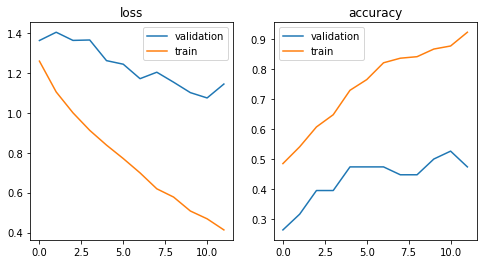

In [16]:
train_loader, test_loader, val_loader,_ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 12)

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.377243
Train Epoch: 0 [150/197 (71%)]	Loss: 1.386118
train loss: 1.2224, Accuracy: 102/197 (52%)
validation loss: 1.3249, Accuracy: 13/38 (34%)

Train Epoch: 1 [0/197 (0%)]	Loss: 1.146753
Train Epoch: 1 [150/197 (71%)]	Loss: 1.045251
train loss: 1.0176, Accuracy: 121/197 (61%)
validation loss: 1.3317, Accuracy: 14/38 (37%)

Train Epoch: 2 [0/197 (0%)]	Loss: 0.855165
Train Epoch: 2 [150/197 (71%)]	Loss: 0.886201
train loss: 0.8336, Accuracy: 147/197 (75%)
validation loss: 1.2275, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/197 (0%)]	Loss: 0.713327
Train Epoch: 3 [150/197 (71%)]	Loss: 0.709375
train loss: 0.6701, Accuracy: 160/197 (81%)
validation loss: 1.1345, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/197 (0%)]	Loss: 0.711853
Train Epoch: 4 [150/197 (71%)]	Loss: 0.5

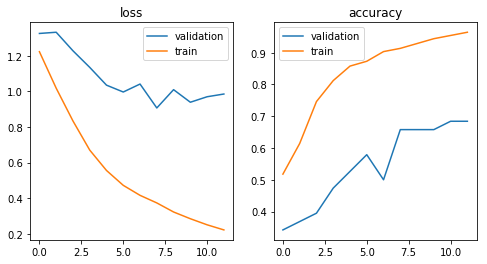

In [17]:
train_loader, test_loader, val_loader,_ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 12)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.401701
Train Epoch: 0 [150/198 (71%)]	Loss: 1.320182
train loss: 1.2305, Accuracy: 107/198 (54%)
validation loss: 1.2632, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.112973
Train Epoch: 1 [150/198 (71%)]	Loss: 1.139990
train loss: 1.0289, Accuracy: 124/198 (63%)
validation loss: 1.1832, Accuracy: 14/38 (37%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.121603
Train Epoch: 2 [150/198 (71%)]	Loss: 1.046485
train loss: 0.8951, Accuracy: 136/198 (69%)
validation loss: 1.1348, Accuracy: 16/38 (42%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.763890
Train Epoch: 3 [150/198 (71%)]	Loss: 0.788943
train loss: 0.8125, Accuracy: 144/198 (73%)
validation loss: 1.1031, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.665841
Train Epoch: 4 [150/198 (71%)]	Loss: 0.7

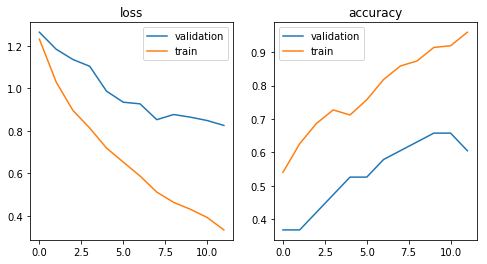

In [18]:
train_loader, test_loader, val_loader,_ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 12)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/200 (0%)]	Loss: 1.388964
Train Epoch: 0 [150/200 (71%)]	Loss: 1.201816
train loss: 1.1108, Accuracy: 120/200 (60%)
validation loss: 1.2765, Accuracy: 19/38 (50%)

Train Epoch: 1 [0/200 (0%)]	Loss: 1.011372
Train Epoch: 1 [150/200 (71%)]	Loss: 0.881560
train loss: 0.8374, Accuracy: 144/200 (72%)
validation loss: 1.1524, Accuracy: 21/38 (55%)

Train Epoch: 2 [0/200 (0%)]	Loss: 0.651343
Train Epoch: 2 [150/200 (71%)]	Loss: 0.720224
train loss: 0.6163, Accuracy: 168/200 (84%)
validation loss: 0.8941, Accuracy: 27/38 (71%)

Train Epoch: 3 [0/200 (0%)]	Loss: 0.513080
Train Epoch: 3 [150/200 (71%)]	Loss: 0.462280
train loss: 0.4600, Accuracy: 174/200 (87%)
validation loss: 0.7609, Accuracy: 28/38 (74%)

Train Epoch: 4 [0/200 (0%)]	Loss: 0.634997
Train Epoch: 4 [150/200 (71%)]	Loss: 0.3

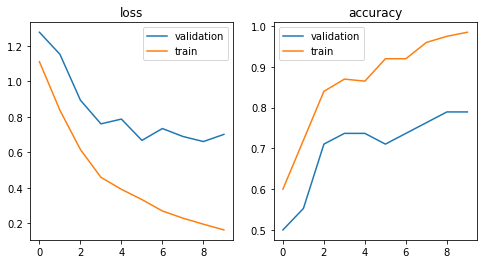

In [19]:
train_loader, test_loader, val_loader,_ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.372023
Train Epoch: 0 [150/194 (71%)]	Loss: 1.312136
train loss: 1.1968, Accuracy: 106/194 (55%)
validation loss: 1.3076, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/194 (0%)]	Loss: 1.059393
Train Epoch: 1 [150/194 (71%)]	Loss: 1.131065
train loss: 1.0057, Accuracy: 128/194 (66%)
validation loss: 1.2626, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.908531
Train Epoch: 2 [150/194 (71%)]	Loss: 0.878089
train loss: 0.8390, Accuracy: 140/194 (72%)
validation loss: 1.2008, Accuracy: 18/38 (47%)

Train Epoch: 3 [0/194 (0%)]	Loss: 0.861143
Train Epoch: 3 [150/194 (71%)]	Loss: 0.778713
train loss: 0.7135, Accuracy: 154/194 (79%)
validation loss: 1.1794, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/194 (0%)]	Loss: 0.761252
Train Epoch: 4 [150/194 (71%)]	Loss: 0.7

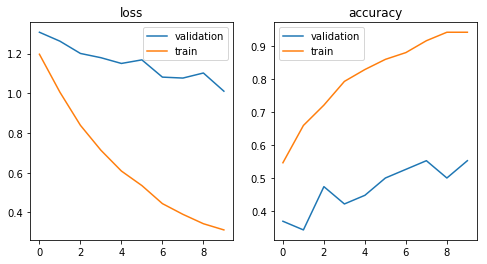

In [20]:
train_loader, test_loader, val_loader,_ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)

Train data shape:  (193, 22, 1000)
Train labels shape:  (193,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/193 (0%)]	Loss: 1.393998
Train Epoch: 0 [150/193 (71%)]	Loss: 1.264982
train loss: 1.2269, Accuracy: 118/193 (61%)
validation loss: 1.3085, Accuracy: 17/38 (45%)

Train Epoch: 1 [0/193 (0%)]	Loss: 1.159505
Train Epoch: 1 [150/193 (71%)]	Loss: 1.132002
train loss: 0.9952, Accuracy: 121/193 (63%)
validation loss: 1.2185, Accuracy: 19/38 (50%)

Train Epoch: 2 [0/193 (0%)]	Loss: 1.068581
Train Epoch: 2 [150/193 (71%)]	Loss: 0.851769
train loss: 0.8491, Accuracy: 136/193 (70%)
validation loss: 1.1691, Accuracy: 21/38 (55%)

Train Epoch: 3 [0/193 (0%)]	Loss: 0.974980
Train Epoch: 3 [150/193 (71%)]	Loss: 0.721395
train loss: 0.7100, Accuracy: 153/193 (79%)
validation loss: 1.0606, Accuracy: 23/38 (61%)

Train Epoch: 4 [0/193 (0%)]	Loss: 0.566532
Train Epoch: 4 [150/193 (71%)]	Loss: 0.6

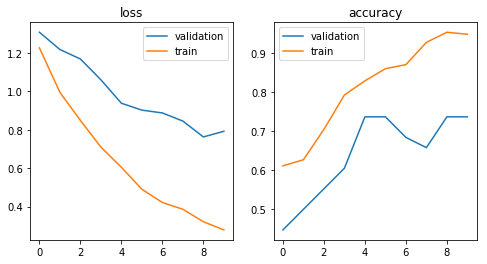

In [21]:
train_loader, test_loader, val_loader,_ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)

Train data shape:  (1782, 22, 1000)
Train labels shape:  (1782,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (333, 22, 1000)
Validation labels shape:  (333,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
Train Epoch: 0 [0/1782 (0%)]	Loss: 1.411482
Train Epoch: 0 [150/1782 (8%)]	Loss: 1.338488
Train Epoch: 0 [300/1782 (17%)]	Loss: 1.386766
Train Epoch: 0 [450/1782 (25%)]	Loss: 1.337354
Train Epoch: 0 [600/1782 (33%)]	Loss: 1.263647
Train Epoch: 0 [750/1782 (42%)]	Loss: 1.307571
Train Epoch: 0 [900/1782 (50%)]	Loss: 1.176325
Train Epoch: 0 [1050/1782 (58%)]	Loss: 1.200036
Train Epoch: 0 [1200/1782 (67%)]	Loss: 1.303237
Train Epoch: 0 [1350/1782 (75%)]	Loss: 1.357154
Train Epoch: 0 [1500/1782 (83%)]	Loss: 1.238541
Train Epoch: 0 [1650/1782 (92%)]	Loss: 1.169527
train loss: 1.1150, Accuracy: 923/1782 (52%)
validation loss: 1.1900, Accuracy: 168/333 (50%)

Train Epoch: 1 [0/1782 (0%)]	Loss: 1.048198
Train Epoch: 1 [150/1782 (8%)]	Loss

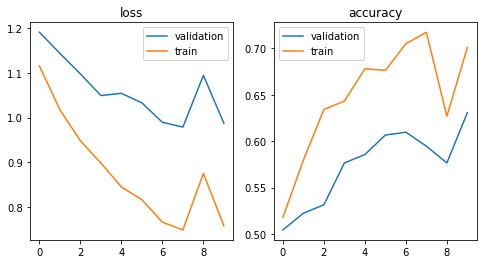

In [22]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val')